In [1]:
#подключение библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Загрузка и просмотр данных
df = pd.read_excel('FPS_hw_x_df_x_taxi.xlsx')
df.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1


In [3]:
#Описательная статистика по датасету
df.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,462807.384000,4.044000,21.520472,26.275849,0.587000
std,270556.211847,2.007256,4.355491,18.876337,0.492496
min,412.000000,1.000000,14.899553,0.024259,0.000000
25%,227126.500000,2.000000,18.466897,12.176830,0.000000
50%,458637.000000,4.000000,20.414741,22.828544,1.000000
75%,709420.250000,6.000000,23.497139,36.434558,1.000000
max,919196.000000,7.000000,50.206056,138.950082,1.000000


In [4]:
# Формирование выборок
df_economy = df[df['offer_class_group'] == 'Economy']
df_comfort = df[df['offer_class_group'] == 'Comfort']

print('Выборки имеют одинаковую длинну: ', len(df_economy) == len(df_comfort))

Выборки имеют одинаковую длинну:  True


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


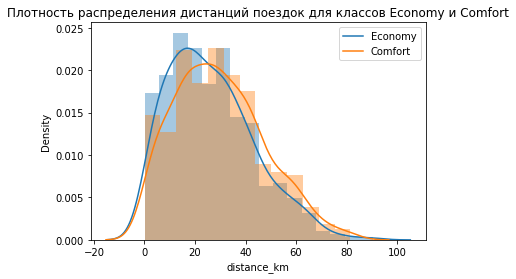

In [5]:
#Визуализация плотности распределения данных
#плотность распределения дистанций поездок для классов “Economy” и “Comfort”
sns.distplot(df_economy['distance_km'])
sns.distplot(df_comfort['distance_km'])
plt.title('Плотность распределения дистанций поездок для классов Economy и Comfort')
plt.legend(['Economy', 'Comfort'])
plt.show()

Гипотеза H0: На дальние поездки, пользователи предпочитают Economy-классу более комфортные условия поездки - Comfort-класс

In [6]:
#Проверка Т-Тестом и Манна-Уитни
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

alpha = 0.05                          # Уровень значимости

In [7]:
result = ttest_ind(df_economy['distance_km'], df_comfort['distance_km'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00156751
Отвергаем нулевую гипотезу


In [8]:
result = mannwhitneyu(df_economy['distance_km'], df_comfort['distance_km'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00128491
Отвергаем нулевую гипотезу


###Вывод
По результатам проверки **отклоняем** нулевую гипотезу о том, что "На дальние поездки, пользователи предпочитают Economy-классу более комфортные условия поездки - Comfort-класс"